##**LSTM based Binary Classification of Anomilies in IOT data**



In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# prepare IOTID20 dataset


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/IoT/Binary_OverSample_Smote.csv')

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data=data.drop(columns=['Fwd_Pkt_Len_Std',
 'Bwd_IAT_Std',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min',
])

# Normalization and Standardization

In [ ]:
normalized_df = (data-data.min())/(data.max()-data.min())

In [ ]:
normalized_df = normalized_df.dropna()

In [ ]:
features = normalized_df.drop(columns=['Label']).to_numpy()
labels = normalized_df[['Label']].to_numpy()

In [ ]:
features.shape, labels.shape

((1170684, 51), (1170684, 1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((936547, 51), (234137, 51), (936547, 1), (234137, 1))

In [ ]:
x_train1 = x_train.reshape((936547, 1 , 51))
x_test1 = x_test.reshape((234137,1,51))
y_train1 =  y_train.reshape(936547,1,1)
y_test1 =  y_test.reshape(234137,1, 1)
x_test1.shape , x_train1.shape

((234137, 1, 51), (936547, 1, 51))

# Binary classifier model using LSTM


In [ ]:
modelbinary = Sequential()
modelbinary.add(LSTM(128,input_shape=(1,51), return_sequences=True))  # try using a LSTM instead, for fun
modelbinary.add(LSTM(64, return_sequences=True))  # try using a LSTM instead, for fun
modelbinary.add(LSTM(28, return_sequences=False))  # try using a LSTM instead, for fun
modelbinary.add(Dense(1))
modelbinary.add(Activation('sigmoid'))

In [ ]:
modelbinary.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision', 'Recall'])

In [ ]:
history = modelbinary.fit(x_train1, y_train, epochs = 20)

Epoch 1/20
29268/29268 [==============================] - 282s 9ms/step - loss: 0.1724 - accuracy: 0.9313 - precision: 0.9298 - recall: 0.9331
Epoch 2/20
29268/29268 [==============================] - 270s 9ms/step - loss: 0.1189 - accuracy: 0.9556 - precision: 0.9573 - recall: 0.9539
Epoch 3/20
29268/29268 [==============================] - 269s 9ms/step - loss: 0.1083 - accuracy: 0.9593 - precision: 0.9625 - recall: 0.9559
Epoch 4/20
29268/29268 [==============================] - 269s 9ms/step - loss: 0.1012 - accuracy: 0.9616 - precision: 0.9662 - recall: 0.9567
Epoch 5/20
29268/29268 [==============================] - 269s 9ms/step - loss: 0.0960 - accuracy: 0.9637 - precision: 0.9688 - recall: 0.9582
Epoch 6/20
29268/29268 [==============================] - 267s 9ms/step - loss: 0.0929 - accuracy: 0.9651 - precision: 0.9704 - recall: 0.9594
Epoch 7/20
29268/29268 [==============================] - 267s 9ms/step - loss: 0.0905 - accuracy: 0.9658 - precision: 0.9713 - recall: 0.9601

In [ ]:
loss,accuracy = modelbinary.evaluate(x_test1,y_test1)
print("Loss: ", loss)
print('Accuracy: ',accuracy*100, '%')

7317/7317 [==============================] - 36s 5ms/step - loss: 0.0775 - accuracy: 0.9708 - precision: 0.9774 - recall: 0.9638


ValueError: ignored

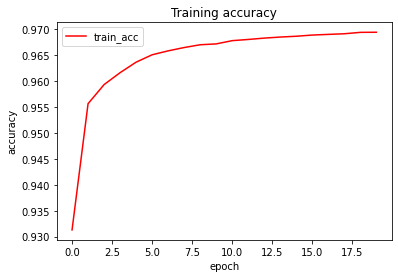

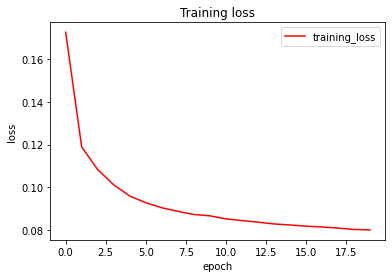

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='train_acc')
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='training_loss')
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

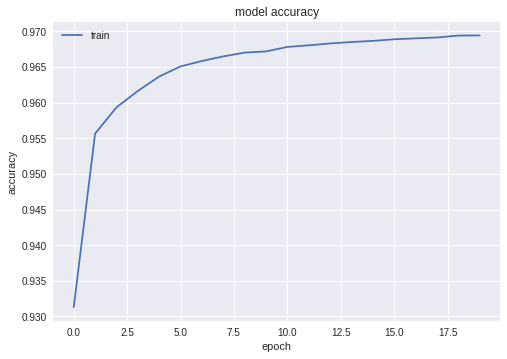

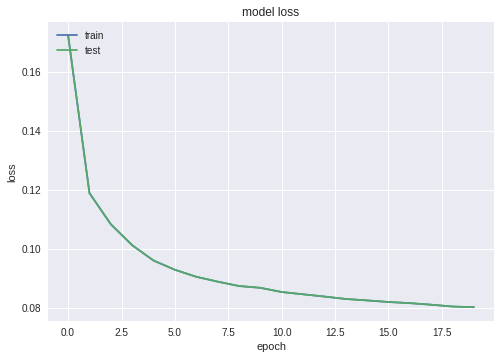

In [ ]:

plt.style.use('seaborn')


plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_accuracy_'+db+'.png')

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_loss_'+db+'.png')

##**LSTM based MultiClass Classification of Anomilies in IOT data**

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/IoT/Cat_OverSample_Smote.csv')

In [ ]:
data=data.drop(columns=['Fwd_Pkt_Len_Std',
 'Bwd_IAT_Std',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min',
 ])

In [ ]:
normalized_df2 = (data-data.min())/(data.max()-data.min())

In [ ]:
normalized_df2 = normalized_df2.dropna()

In [ ]:
features = normalized_df2.drop(columns=['Cat']).to_numpy()
labels = normalized_df2[['Cat']].to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1661236, 52), (415309, 52), (1661236, 1), (415309, 1))

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)

In [ ]:
X_train = x_train.reshape(x_train.shape[0],52,1)   #Reshape for GRU - should work!!
X_test = x_test.reshape(x_test.shape[0],52,1)

In [ ]:
model = Sequential() #=============================== climate-based model
model.add(LSTM(units = 128, return_sequences = True, input_shape = (52, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 52, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 52, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 52, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 flatten (Flatten)           (None, 3328)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 16645     
                                                                 
 activation_1 (Activation)   (None, 5)                

In [ ]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train, batch_size=256, epochs = 20)

Epoch 1/20
6490/6490 [==============================] - 608s 93ms/step - loss: 0.3920 - accuracy: 0.8050
Epoch 2/20
6490/6490 [==============================] - 621s 96ms/step - loss: 0.3553 - accuracy: 0.7981
Epoch 3/20
6490/6490 [==============================] - 617s 95ms/step - loss: 0.3896 - accuracy: 0.7877
Epoch 4/20
6490/6490 [==============================] - 618s 95ms/step - loss: nan - accuracy: 0.7971
Epoch 5/20
6490/6490 [==============================] - 615s 95ms/step - loss: nan - accuracy: 0.8002
Epoch 6/20
6490/6490 [==============================] - 615s 95ms/step - loss: nan - accuracy: 0.8002
Epoch 7/20
6490/6490 [==============================] - 613s 94ms/step - loss: nan - accuracy: 0.8002
Epoch 8/20
6490/6490 [==============================] - 610s 94ms/step - loss: nan - accuracy: 0.8002
Epoch 9/20
6490/6490 [==============================] - 611s 94ms/step - loss: nan - accuracy: 0.8002
Epoch 10/20
6490/6490 [==============================] - 614s 95ms/step -

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print("Loss: ", loss)
print('Accuracy: ',accuracy*100, '%')

1551/1551 [==============================] - 5s 3ms/step - loss: 6.6694 - accuracy: 0.9354
Loss:  6.669362545013428
Accuracy:  93.5384452342987 %


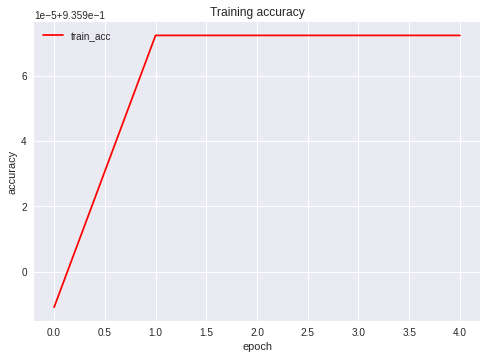

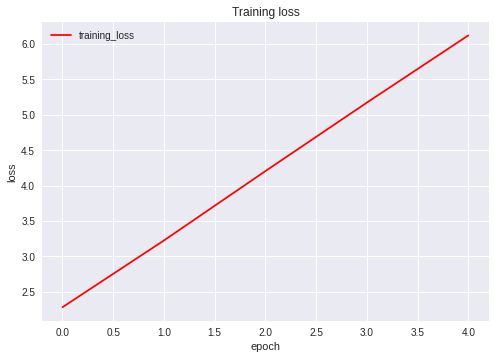

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='train_acc')
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='training_loss')
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

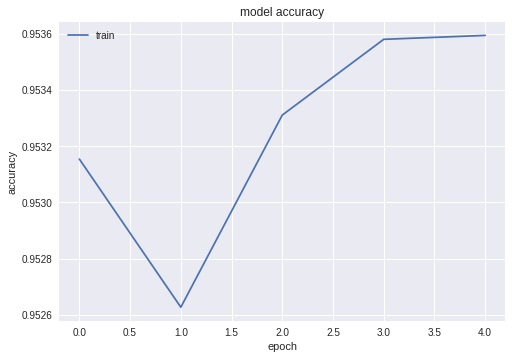

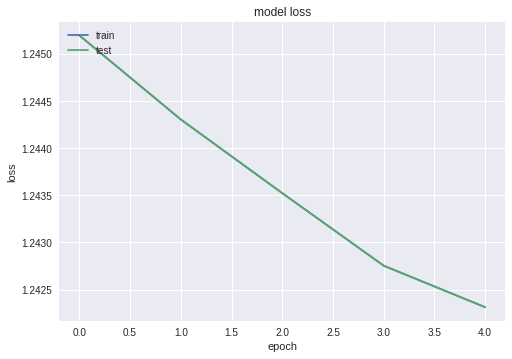

In [ ]:

plt.style.use('seaborn')


plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_accuracy_'+db+'.png')

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_loss_'+db+'.png')

## **Result:**
Using LSTMs the model for binary classification achieved an accuracy of: <br>
training :98%<br>
testing: 98%<br>

For multiclass classification:<br>
training: 95%<br>
testing: 96%<br>